In [223]:
# import relevant modules 
import os
import sys
from importlib import reload
import time
import numpy as np
from sympy import Matrix
from math import isclose
import matplotlib.pyplot as plt

# locate directory containing scripts 
current_directory = os.getcwd() 
src_directory = os.path.dirname(current_directory) + '/src'
sys.path.append(src_directory)

# import custom modules
import spin_chain, generate_VTA_list, simulate_algorithm
reload(spin_chain)
reload(generate_VTA_list)
reload(simulate_algorithm); 

# $\text{Four Sites}$

In [60]:
N_qubits = 4
Jx = 1
Jy = 1
Jz = 1
periodic_bc = True
tolerance = 1e-9

# collect properties of spin chain
H4, H4_list, eigenstates4, eigenvalues4, E4_0, ρ_ground_state4 = \
    spin_chain.properties(N_qubits, Jx, Jy, Jz, periodic_bc, tolerance)

In [61]:
α_start = 0
α_end = 1
α_steps = 100
Jx = 1
Jy = 1
Jz = 1
Es = E4_0 #-2*np.sqrt(13) - 4

In [62]:
start_time = time.time()
VTA4_list = generate_VTA_list.SU2_automated(N_qubits, α_start, α_end, α_steps, Jx, Jy, Jz, Es)
print("%s seconds" % (time.time() - start_time))

0.49961113929748535 seconds


# $\text{Six Sites}$

In [63]:
N_qubits = 6
Jx = 1
Jy = 1
Jz = 1
periodic_bc = True
tolerance = 1e-9

# collect properties of spin chain
H6, H6_list, eigenstates6, eigenvalues6, E6_0, ρ_ground_state6 = \
    spin_chain.properties(N_qubits, Jx, Jy, Jz, periodic_bc, tolerance)

In [108]:
α_start = 0
α_end = 1
α_steps = 1
Jx = 1
Jy = 1
Jz = 1
Es = E6_0

In [111]:
start_time = time.time()
VTA6_list = generate_VTA_list.SU2_automated(N_qubits, α_start, α_end, α_steps, Jx, Jy, Jz, Es)
print("%s seconds" % (time.time() - start_time))

15.980942964553833 seconds


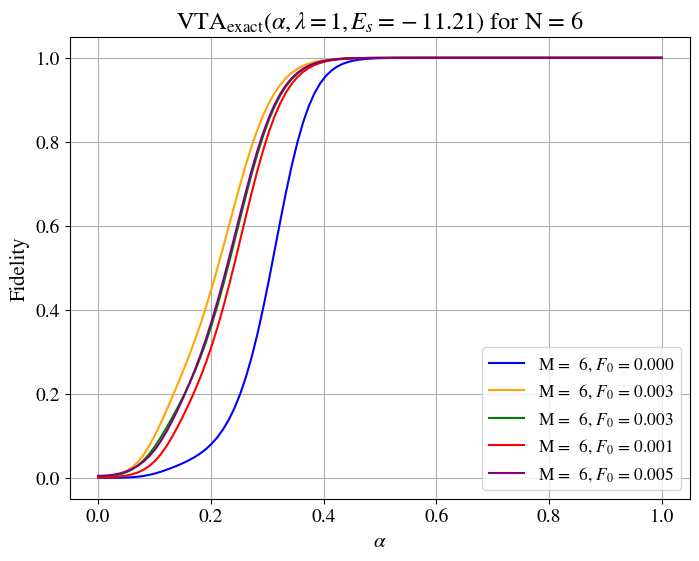

In [98]:
# define parameters for simulations
N_cavities = 6
N_qubits = 6
α_start = 0
α_end = 1
α_steps = 100
m_start = 6
m_stop = 6
E_0 = E6_0
num_states = 5
tolerance = tolerance
cutoff = 'N/A'
save_file = False

Ψ0_list, ψ0_list = simulate_algorithm.generate_initial_states(N_cavities, N_qubits, num_states, cutoff)
VTA_exact_fidelity_array = \
simulate_algorithm.plot_exact_fidelity(N_cavities, α_start, α_end, α_steps, E_0, m_start, m_stop, 
                                       N_qubits, Jx, Jy, Jz, periodic_bc, tolerance, ψ0_list, save_file)
# plt.savefig('graph1')

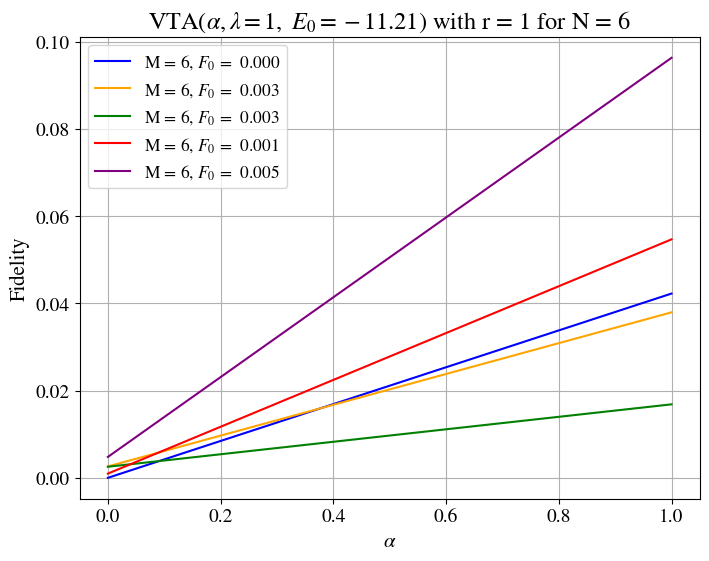

In [125]:
Es = E6_0
r = 1
asymptotes = False
return_fidelity_array = True
save_file = True

VTA_fidelity_array = simulate_algorithm.VTA_fidelity(
                     N_qubits, ψ0_list, VTA6_list, ρ_ground_state6, α_start, α_end, α_steps, 
                     Jx, Jy, Jz, Es, r, m_start, m_stop, asymptotes, save_file, \
                     return_fidelity_array = return_fidelity_array)

In [114]:
for fidelity_list in VTA_fidelity_array: 
    
    print(np.argmax(fidelity_list))

25
25
25
25
25


In [115]:
np.linspace(α_start, α_end, α_steps)[25]

0.25252525252525254

# $\text{Sweep Over } E_s$

In [133]:
spectrum_list = [-2*np.sqrt(13) - 4] + \
                [-2*np.sqrt(5) - 4]*3 + \
                [-6] + [-np.sqrt(17) - 1]*6 + \
                [-4]*6 + [-2]*7 + [0]*10 + \
                [-4 + 2*np.sqrt(5)]*3 + [2]*3 + \
                [-1 + np.sqrt(17)]*6 + \
                [-4 + 2*np.sqrt(13)] + \
                [4]*10 + [6]*7
Es_list = sorted(set(spectrum_list))
Es_list

[-11.21110255092798,
 -8.47213595499958,
 -6,
 -5.123105625617661,
 -4,
 -2,
 0,
 0.4721359549995796,
 2,
 3.1231056256176606,
 3.2111025509279782,
 4,
 6]

In [136]:
α_start = 0
α_end = 1
α_steps = 101
Jx = 1
Jy = 1
Jz = 1
asymptotes = False
return_fidelity_array = True
save_file = True

0
1
2
3
4
5
6
7
8
9
10
11
12


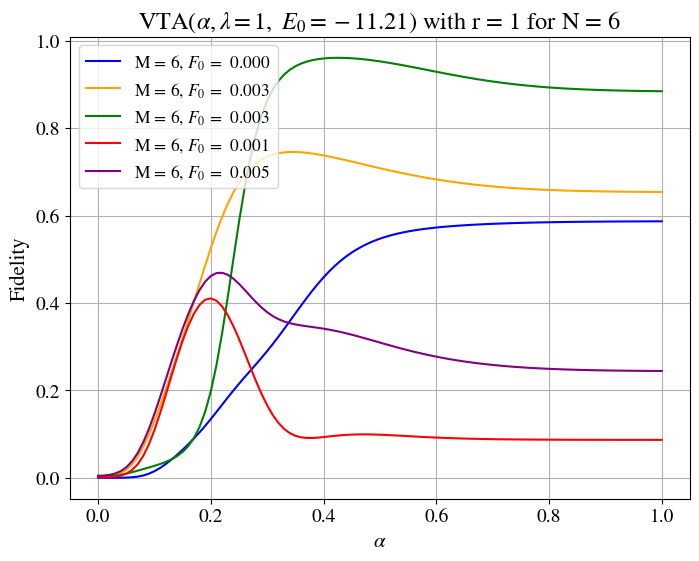

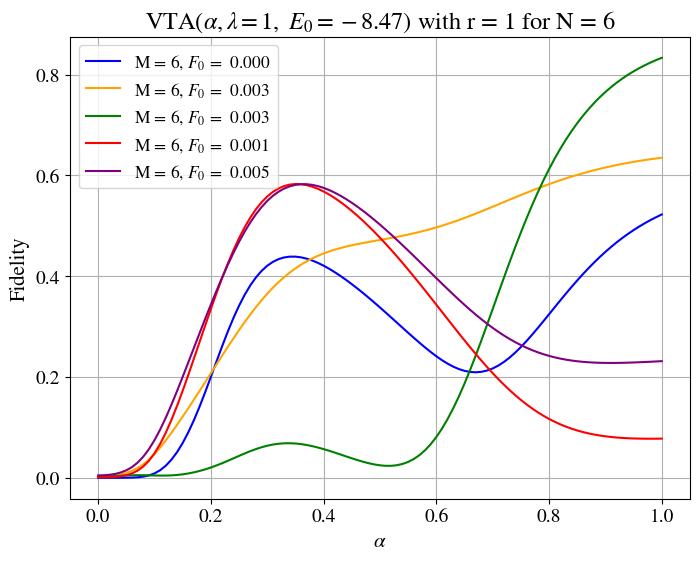

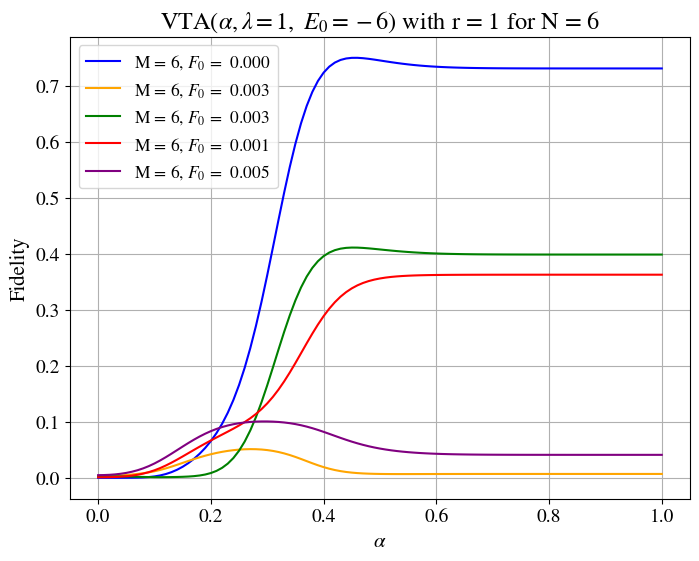

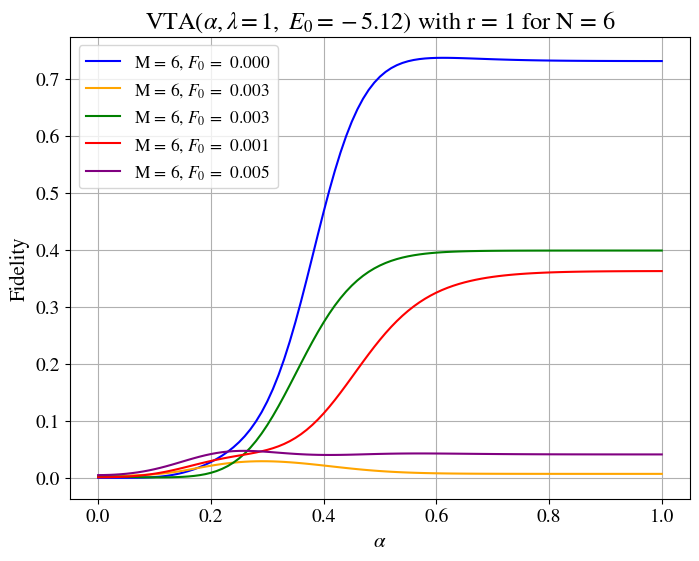

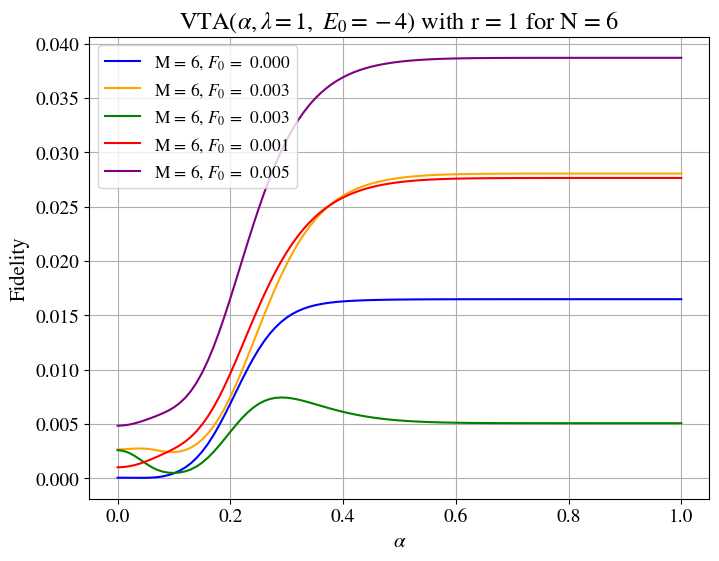

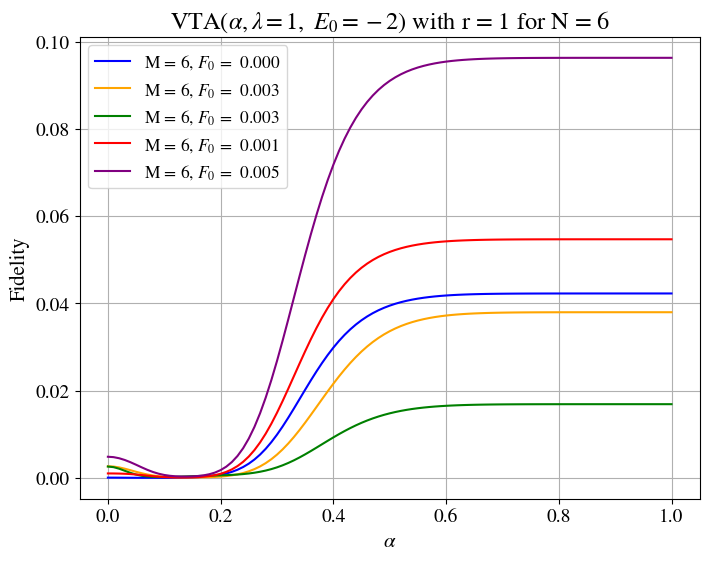

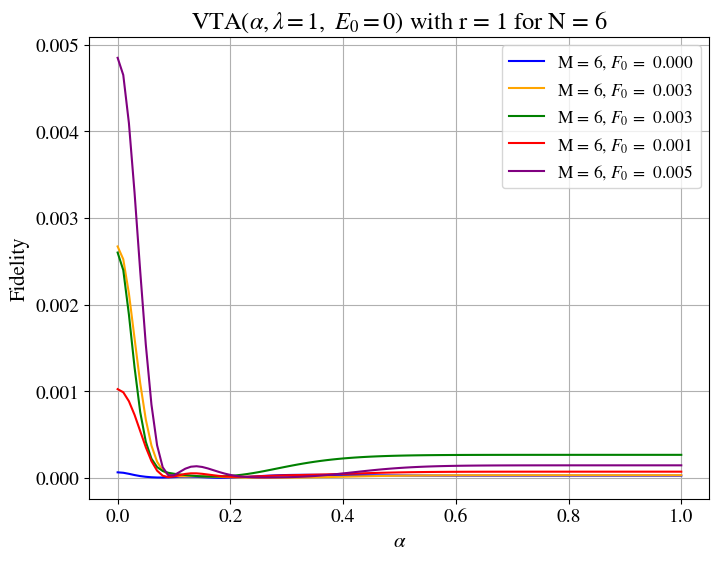

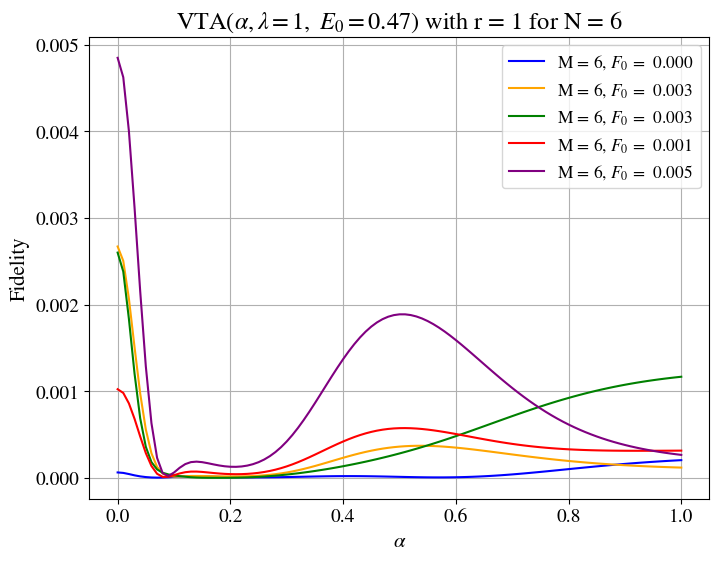

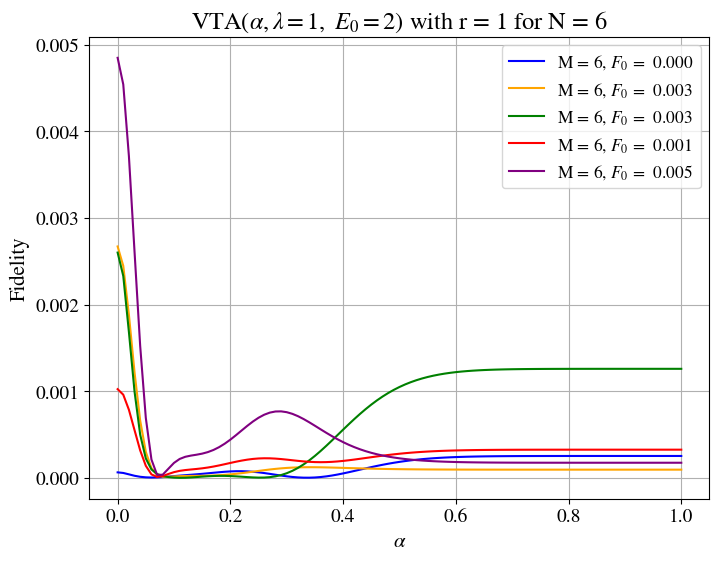

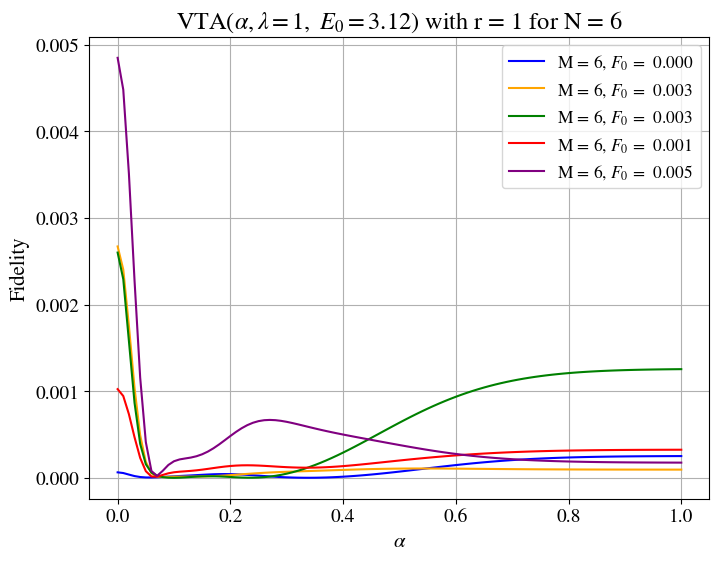

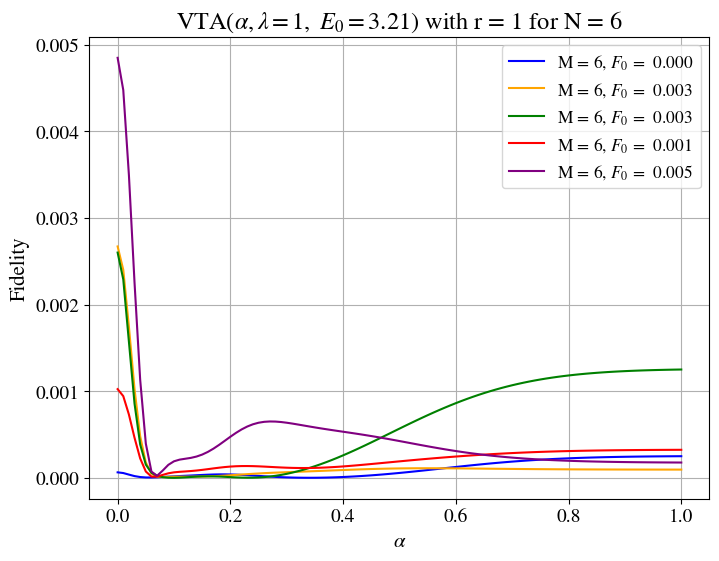

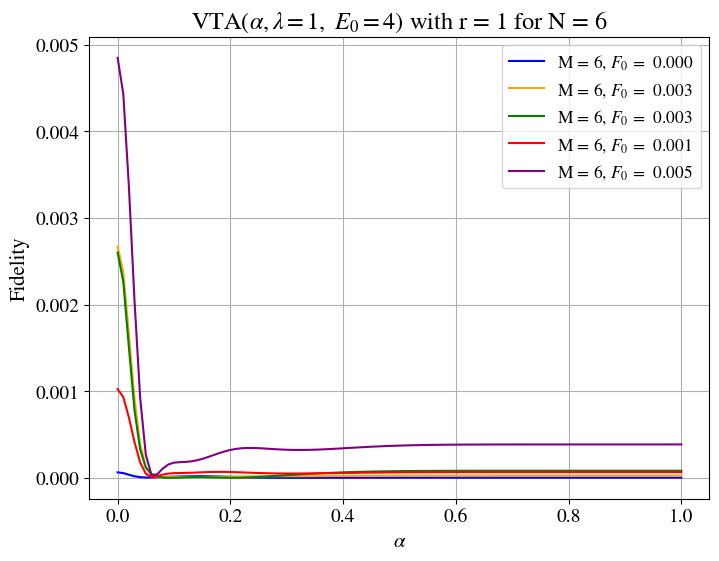

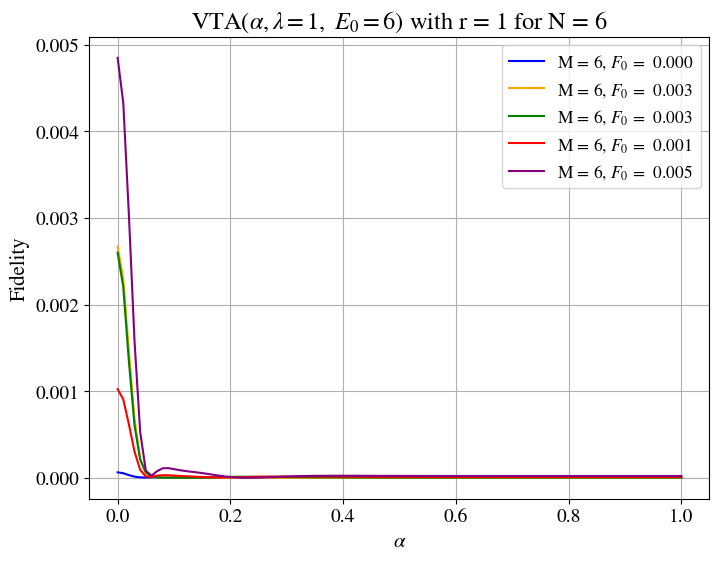

In [137]:
for i, Es in enumerate(Es_list): 
    print(i)
    VTA6_list = generate_VTA_list.SU2_automated(N_qubits, α_start, α_end, α_steps, Jx, Jy, Jz, Es)
    VTA_fidelity_array = simulate_algorithm.VTA_fidelity(
                         N_qubits, ψ0_list, VTA6_list, ρ_ground_state6, α_start, α_end, α_steps, 
                         Jx, Jy, Jz, Es, r, m_start, m_stop, asymptotes, save_file, \
                         return_fidelity_array = return_fidelity_array)

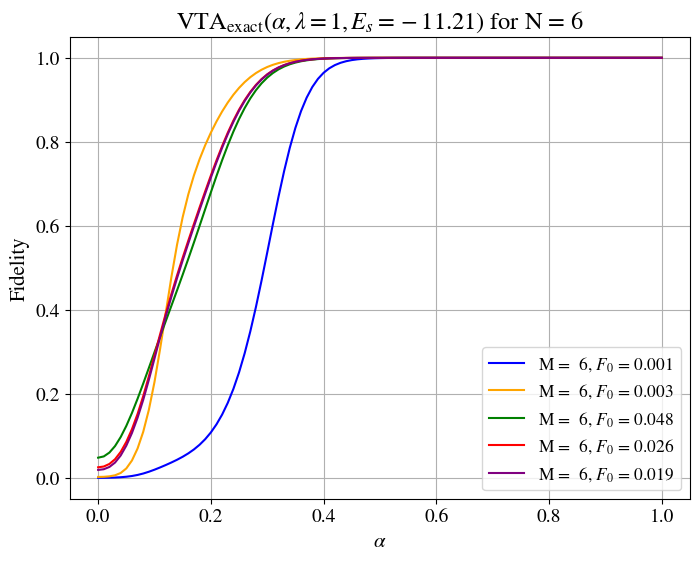

In [217]:
Es = Es_list[0]
Ψ0_list, ψ0_list = simulate_algorithm.generate_initial_states(N_cavities, N_qubits, num_states, cutoff)
VTA_exact_fidelity_array = \
simulate_algorithm.plot_exact_fidelity(N_cavities, α_start, α_end, α_steps, Es, m_start, m_stop, 
                                       N_qubits, Jx, Jy, Jz, periodic_bc, tolerance, ψ0_list, save_file)

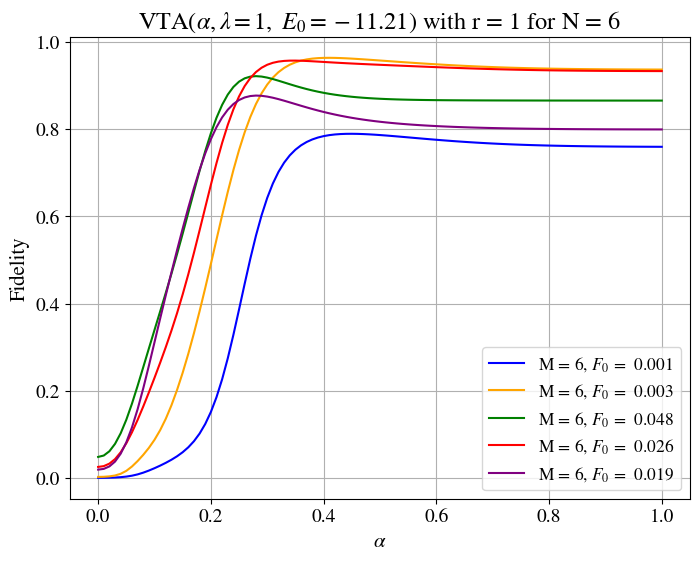

In [229]:
r = 1

# locate directory containing VTA data 
current_directory = os.getcwd() 
path = os.path.dirname(current_directory) + \
   f'/data/{N_qubits}_sites/VTA_data/' \
   f'VTA{N_qubits}_list_{α_start}_{α_end}_{α_steps}_{round(Es, 2)}'

# to upload saved data use following code
with open(path, 'rb') as file:
    VTA6_list = pickle.load(file)
VTA_fidelity_array = simulate_algorithm.VTA_fidelity(
                     N_qubits, ψ0_list, VTA6_list, ρ_ground_state6, α_start, α_end, α_steps, 
                     Jx, Jy, Jz, Es, r, m_start, m_stop, asymptotes, save_file, \
                     return_fidelity_array = return_fidelity_array)

# $\text{Symmetry Eigenstates} $

In [53]:
from qutip import simdiag, commutator, sigmax, sigmay, sigmaz, qeye, tensor, Qobj, qdiags

In [54]:
N = 6
return_operators = True

return_operators = True
H6, S2, Sz, σ36, P, eigvecs, ρ_list = spin_chain.symmetry_eigvecs( \
                                      N, Jx, Jy, Jz, periodic_bc, return_operators = return_operators)

In [56]:
VTA6_list

In [55]:
VTA6_P_list = [VTA.transform(P.dag()).tidyup(atol = tolerance) for VTA in VTA6_list]

TypeError: 'NoneType' object is not iterable

In [789]:
σ36.transform(P.dag()).tidyup(atol = tolerance).diag()

array([ 1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
        1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [47]:
M = VTA6_P_list[4]

NameError: name 'VTA6_P_list' is not defined

In [863]:
#for M in VTA6_P_list: 

# send each diagonal term to 0 
Q = M - qdiags(M.diag(), dims = [[2]*N, [2]*N])

# find OD_coords that specify coordinates of all off-diagonal entries
OD_coords = [(i,j) for i, j in zip(*np.where(Q.full() != 0))]

# ensure all each nonzero off-diagonal at (i,j) has a corresponding 
# pair at (j,i)
num_OD_coords = len(OD_coords)
OD_coord_pairs = 2*len(set([tuple(np.sort([i,j])) for i, j in OD_coords]))
pair_bool = num_OD_coords == OD_coord_pairs

# verify abs(Q[(i,j)]) = abs(Q[(j,i)])
moduli_bool_list = []
for coords in OD_coords: 
    # verify the moduli of each off-diagonal pair is equivalent
    modulus_bool = np.isclose(abs(Q[coords]), abs(Q[tuple(reversed(coords))]), \
                   rtol = 0, atol = tolerance)
    moduli_bool_list.append(modulus_bool)
    
moduli_bool = np.all(moduli_bool_list)

if moduli_bool and pair_bool:
    
    # collect one tuple from each coordinate pair 
    OD_coords_set = set([tuple(np.sort([i,j])) for i, j in OD_coords])

    OD_moduli_list = []
    for coords in OD_coords_set: 
        OD_moduli_list.append(abs(Q[coords]))
else: 
    raise ValueError('There exists at least one off-diagonal entry '\
                     + 'with no corresponding pair' \
                     + 'or the moduli of at least one pair are not equal')
    
OD_moduli_list

[0.0023378934794993714,
 0.0015129109623756773,
 0.03296465364095437,
 0.0025297126912707944,
 0.0015129109623771805,
 0.001512910962377333,
 0.014466671473432233,
 0.014466671473432271,
 0.0010231279735073721,
 0.0144666714734321,
 0.005068991801553094,
 0.0015129109623763868,
 0.0023378934794973964,
 0.005068991801552962,
 0.001512910962376259,
 0.0025297126912719224,
 0.0023378934794975313,
 0.014466671473432136,
 0.03296465364095213,
 0.0023378934794973916,
 0.0015129109623762825,
 0.001023127973507569,
 0.005068991801553014,
 0.002337893479497535,
 0.005068991801553404,
 0.0015129109623762498,
 0.06585120385287266,
 0.0010231279735074162,
 0.0025297126912707988,
 0.014466671473432328,
 0.03296465364095426,
 0.003629292698364095,
 0.014466671473432027,
 0.0015129109623772871,
 0.0015129109623772258,
 0.0023378934794993245,
 0.001512910962377343,
 0.005068991801551973,
 0.023542623255798,
 0.005068991801553408]